## 9.1 Singular Value Decomposition

The reason why SVD is so useful is because it is applicable to $all$ $m \times n$ $matrices$ regardless of their shape (not exclusive to square matrices). 

<br />
SVD finds the direction of maximum stretching.

- Unlike eigendecomposition (applicable  to square matrices only), SVD is applicable to any real-valued matrix.   
  - EDC <> square matrices  
  - SVD <> real-valued matrices

- Decomposes matrix into: 
  - **Singular vectors (analogous to eigenvectors)
  - **Singular values** (analogous to eigenvalues) 
- For some matrix $A$, its SVD is $A$ = $UDV^T$
  - $U$ is an orthogonal $m \times m$ matrix; its columns are the left-singular vectors of $A$.  
  - $V$ is an orthogonal $n \times n$ matrix; its columns are the right-singular vectors of $A$.  
  - $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the singular values of $A$.  

In [1]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1. 

[[-1  2]
 [ 3 -2]
 [ 5  7]]


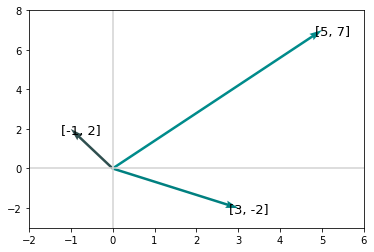

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
print(A)
plot_vectors(A)

In [ ]:
U, d, VT = np.linalg.svd(A)   # V is already transposed   # diagonal
U, d, VT

(array([[ 0.12708324,  0.47409506,  0.87125411],
        [ 0.00164602, -0.87847553,  0.47778451],
        [ 0.99189069, -0.0592843 , -0.11241989]]),
 array([8.66918448, 4.10429538]),
 array([[ 0.55798885,  0.82984845],
        [-0.82984845,  0.55798885]]))

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

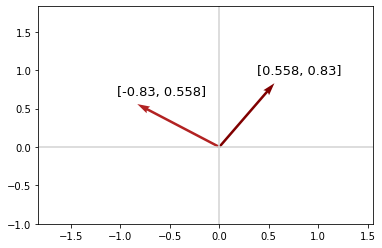

In [ ]:
plot_vectors(VT)

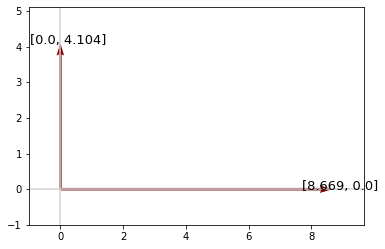

In [ ]:
D = np.diag(d)
plot_vectors(D)

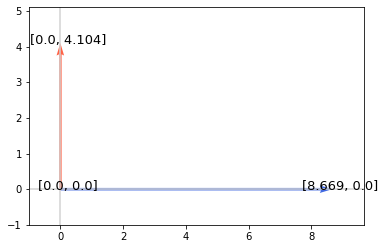

In [ ]:
D = np.concatenate((np.diag(d), [[0,0]]), axis=0)
plot_vectors(D)

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
D, VT, DVT

(array([[8.66918448, 0.        ],
        [0.        , 4.10429538],
        [0.        , 0.        ]]), array([[ 0.55798885,  0.82984845],
        [-0.82984845,  0.55798885]]), array([[ 4.83730827,  7.19410927],
        [-3.40594314,  2.29015105],
        [ 0.        ,  0.        ]]))

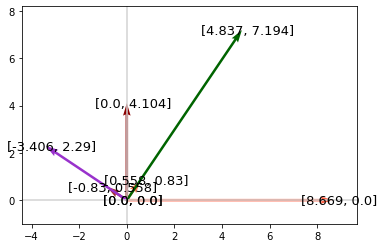

In [ ]:
DVT = np.dot(D, VT)
matrices = [D, VT, DVT]
vector_list = []

for matrix in matrices:
  for vector in matrix: 
    vector_list.append(vector)

plot_vectors(vector_list)

SVD and eigendecomposition are closely related to each other:

Left-singular vectors of $A$ = eigenvectors of $AA^T$.  
Right-singular vectors of $A$ = eigenvectors of $A^TA$.  
Non-zero singular values of $A$ = square roots of eigenvectors of $AA^T$ = square roots of eigenvectors of $A^TA$  
Exercise: Using the matrix P from the preceding PyTorch exercises,   demonstrate that these three SVD-eigendecomposition equations are true.  

### Exercise 2. Prove SVD for P.


In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])

### Exercise 3. Prove SVD for A using PyTorch.


## 9.2 Media File Compression

- ```img.convert('LA')```
- ```.getdata(band=0)```

Image Compression via SVD
The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).


### 1) Load image

In [ ]:
import time
from PIL import Image

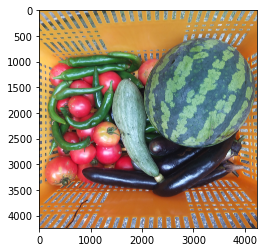

In [ ]:
fruits = Image.open("/content/homestead_produce.jpg")
plt.imshow(fruits)

### 2) Convert to gray scale

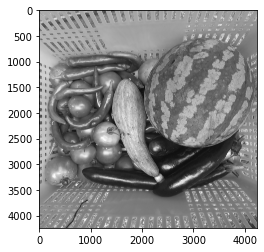

In [ ]:
# Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels:
fruits_gray = fruits.convert('LA')
plt.imshow(fruits_gray)

### 3) Convert data into numpy matrix

In [ ]:
print(fruits_gray.getdata(band=0))
print(fruits_gray.size[1], fruits_gray.size[0])

4240 4240


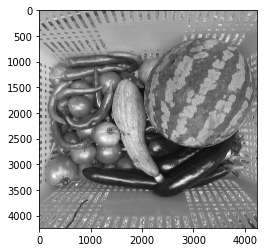

In [ ]:
# Convert data into numpy matrix, which doesn't impact image data:
fruits_mat = np.array(list(fruits_gray.getdata(band=0)), float)
fruits_mat.shape = (fruits_gray.size[1], fruits_gray.size[0])
fruits_mat = np.matrix(fruits_mat)
_ = plt.imshow(fruits_mat, cmap='gray')

### 4) Calculate SVD of the image

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image:

In [ ]:
U.shape, sigma.shape, V.shape

((4240, 4240), (4240,), (4240, 4240))

In [ ]:
U, sigma, V = np.linalg.svd(fruits_mat)
U, sigma, V

(matrix([[-0.0191285 ,  0.0010406 , -0.01044812, ...,  0.01075123,
           0.00373205,  0.00192622],
         [-0.01912285,  0.00108646, -0.01040957, ..., -0.01238355,
          -0.01400338,  0.00228539],
         [-0.01908914,  0.0013077 , -0.01027106, ...,  0.0039585 ,
           0.01584742,  0.00639735],
         ...,
         [-0.01621506,  0.00630539, -0.00464199, ...,  0.00103638,
          -0.01379166,  0.01638889],
         [-0.0161525 ,  0.00644836, -0.0046529 , ...,  0.00691409,
          -0.02603881,  0.01105877],
         [-0.01613711,  0.00644997, -0.00465759, ..., -0.00292954,
           0.02420663, -0.01240747]]),
 array([5.40821977e+05, 7.11067897e+04, 6.23026039e+04, ...,
        3.13901466e-02, 2.06239276e-02, 5.45889399e-03]),
 matrix([[-0.01939943, -0.01938006, -0.01939   , ..., -0.01601931,
          -0.01607665, -0.01611002],
         [-0.01284169, -0.01279647, -0.01287106, ..., -0.01429167,
          -0.01435891, -0.0143021 ],
         [ 0.0059667 ,  0.0061438

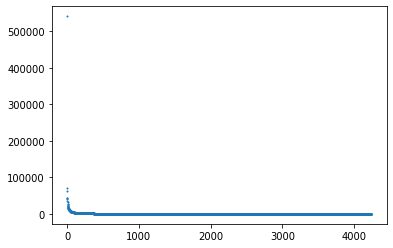

In [ ]:
X = np.arange(len(sigma))

plt.scatter(X, sigma, s=1, label='sigma values')
plt.show()

(-0.5, 4239.5, 4239.5, -0.5)

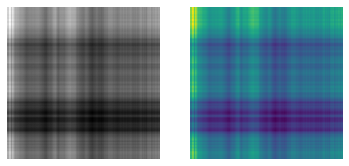

In [ ]:
reconstruct_fruits = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
fig, ax = plt.subplots(1, 2, figsize=(6,6))
ax[0].imshow(reconstruct_fruits, cmap='gray')
ax[0].axis('off')
ax[1].imshow(reconstruct_fruits)
ax[1].axis('off')

Additional singular vectors improve the image quality:

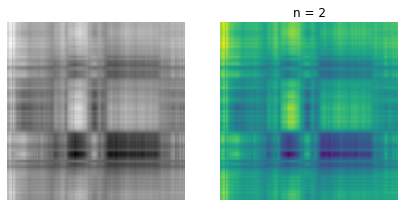

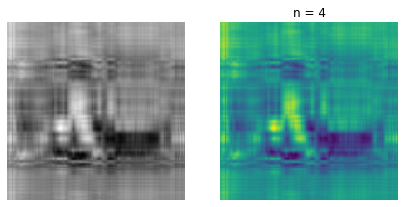

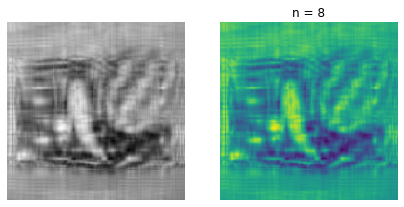

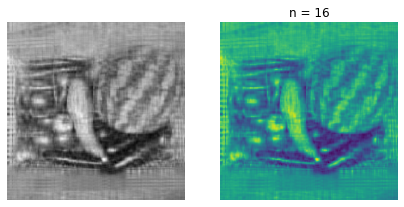

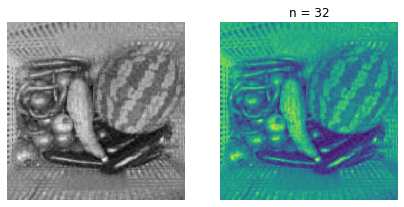

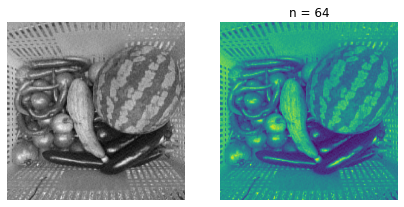

In [ ]:
for i in [2, 4, 8, 16, 32, 64]:  # number of singular values
    fig, ax = plt.subplots(1, 2, figsize=(7,7))
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    ax[0].imshow(reconstimg, cmap='gray')
    ax[0].axis('off')
    ax[1].imshow(reconstimg)
    ax[1].axis('off')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the $data$ $footprint$ is **much smaller** than the original image:

In [ ]:
reconstruct_fruits.shape, fruits_mat.shape

((4240, 4240), (4240, 4240))

In [ ]:
full_representation = fruits_mat.shape[0] * fruits_mat.shape[1]
"{:,}".format(full_representation)

'17,977,600'

In [ ]:
singular_values = [2, 4, 8, 16, 32, 64]

for value in singular_values:
  svd_representation = value * fruits_mat.shape[0] + value + value * fruits_mat.shape[1]
  print(f"n = {value}:", "{:,}".format(svd_representation), f"px / {np.round(svd_representation/full_representation, 4)} %")

n = 2: 16,962 px / 0.0009 %
n = 4: 33,924 px / 0.0019 %
n = 8: 67,848 px / 0.0038 %
n = 16: 135,696 px / 0.0075 %
n = 32: 271,392 px / 0.0151 %
n = 64: 542,784 px / 0.0302 %


## 9.3 The Moore-Penrose Pseudoinverse

The Moore-Penrose Pseudoinverse resolves all limitations surrounding the matrix inversion. 

Matrix inversion
- Matrix is square: $n_{row} = n_{col}$ (i.e., "vector span" = "matrix range")
  - Avoids $overdetermination$: $n_{row}$ ($ of equations) > $n_{col}$ ($ of dims)
  - Avoids $underdetermination$: $n_{row}$ < $n_{col}$ 
- Matrix isn't "singular", i.e.: all columns are linearly independent.

The Moore-Penrose Pseudoinverse is used when matrix can't be inverted.
- For some matrix $A$, its pseudoinverse $A^+$ can be computed by: 
$A^+ = VD^+U^T$
  Where: 
  - $U, D$ and $V$ are $SVD$ of $A$.
  - $D^+ = (D$ with reciprocal of all-non zero elements$)^T$

Let's calculate the pseudoinverse $A^+$ of some matrix $A$ using the formula from the slides:
  $A^+ = VD^+U^T$

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])

In [ ]:
U, d, VT = np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
d

array([8.66918448, 4.10429538])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

To create $D^+$, we first invert the non-zero values of $d$:

In [ ]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [ ]:
1/8.669

0.11535355865728457

In [ ]:
1/4.104

0.24366471734892786

...and then we would take the tranpose of the resulting matrix.

Because $D$ is a diagonal matrix, this can, however, be done in a single step by inverting $D$:

In [ ]:
A.shape[0], A.shape[1]

(3, 2)

In [ ]:
D_inv = np.linalg.inv(D)
D_inv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

$D^+$ must have the same dimensions as $A^T$ in order for $VD^+U^T$ matrix multiplication to be possible:


In [ ]:
D_plus = np.zeros((3, 2)).T
D_plus

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
D_plus[:2, :2] = D_inv
D_plus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

(Recall $D$ must have the same dimensions as $A$ for SVD's $UDV^T$, but for MPP $U$ and $V$ have swapped sides around the diagonal matrix.)

Now we have everything we need to calculate $A^+$ with $VD^+U^T$:


In [ ]:
np.dot(VT.T, np.dot(D_plus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [ ]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

### Exercise
Use the torch.svd() method to calculate the pseudoinverse of A_p, confirming that your result matches the output of torch.pinverse(A_p):

## 9.4 Regression via Pseudoinversion
$A^+$ is $mega$ useful because non-square matrices are common in ML.
$y = a + bx_1 + cx_2 + ... + mx_m$
[$y_1 = a + bx_{1,1} + cx_{1,2} + ... + mx_{1,m}$]  
[$y_2 = a + bx_{2,1} + cx_{2,2} + ... + mx_{2,m}$]  
...  
[$y_n = a + bx_{n,1} + cx_{n,2} + ... + mx_{n,m}$]  
for any house $i$ in the dataset, $yi=price$ and $x_{i,1}$ to $x_{i,m}$ are its features. We solve for parameters $a, b, c$ to $m$.

In the equation $y = Xw$:
- We known the outcomes $y$, which could be house prices. 
- We know the features $X$, which are predictors like bedroom count. 
- Vector $w$ contains the unknowns, the model's learnable parameters.

Assuming $X^{-1}$ exists, matrix inversion can solve for $w$:  
  $Xw = y$   
  $X^{-1}Xw = X^{-1}y$  
  $Iw = X^{-1}y$    
  $w = X^{-1}y$   

Application in ML:   
it is common to have situations where we have many more houses than features about houses. 
- It would be unusual to have exactaly as many cases (n) as the features (m). 
- With pseudoinverse $X^+$, we can estimate model weights $w$ where $n \neq m$:  
  - Plot the pseudo-inverse.  
  $w = X^+y$  
So how does this estimate work? 

<br /> 

Common in ML:
- If $X$ is **overdetermined** $(n > m)$ (many more rows than columns), $X^+$ (the pseudoinverse) provides $Xy$ which is as close to $w$ as possible (in terms of Euclidean distance, specifically $||Xy-w||_2$.

Unusual in ML:   
(neverthesless, it might happen. Likely not gonna get great results in your model, but nevertheless:)  
- If $X$ is **underdetermined** $(n < m)$, $X^+$ provides the $w = X^+y$ solution that has the smallest Euclidean norm $||x||_2$ from all the possible solutions. 


In [26]:
x1 = np.arange(0, 8)                                # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

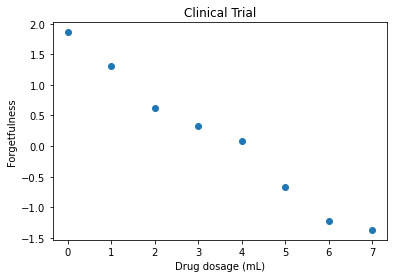

In [10]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to 1 across the board:

In [11]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate $x_0$ and $x_1$ into a matrix $X$:

In [14]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

From the slides, we know that we can calculate the weights $w$ using the equation $w = X^+y$:

In [15]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the $y$-intercept of the line, which is typically denoted as $b$:

In [20]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

While the second weight corresponds to the slope of the line, which is typically denoted as $m$:
- As the slope is negative in this case, we know that there is a negative relationship between the drug dosage $(x)$ and forgetfulness $(y)$.

In [21]:
m = np.asarray(w).reshape(-1)[1]
m

-0.469285714285714

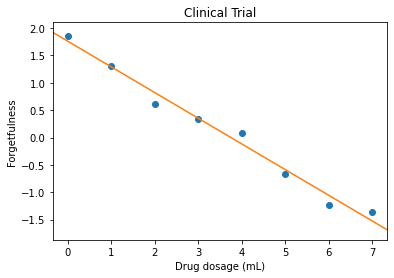

In [27]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

## 9.5 Principal Component Analysis
- Simple machine learning algorithm
- **Unsupervised**: enables identification of structure in unlabled data.
- Like eigendecomposition and SVD, enables lossy compression. 
  - To minimise both loss of precision and data footprint, first **principal component** contains most variance (data structure), second PC contains next most, and so on. 
- Performing PCA involves many linear algebra concepts already covered:
  - Norms
  - Orthogonal and identity matrices.
  - Trace operator
  - Goodfelow et al. (2016) 2.12 for five pages of detail.

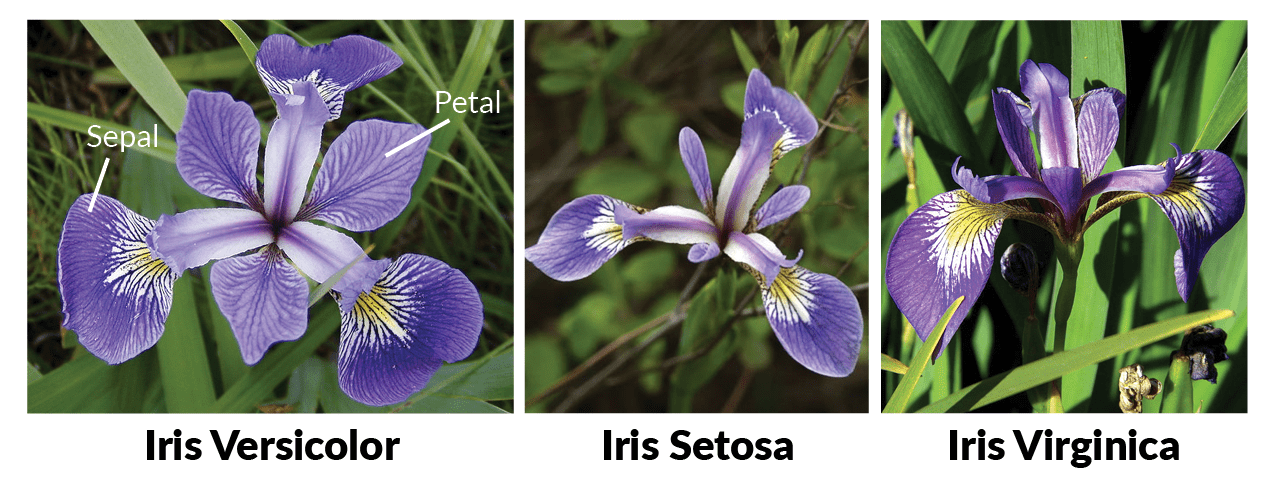
[image from Dr.Rafael Santos](http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html)

In [39]:
from sklearn import datasets

iris = datasets.load_iris()

In [40]:
iris.data.shape

(150, 4)

In [60]:
features = iris.get("feature_names")
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
f1 = iris.data[:, 0]
f2 = iris.data[:, 1]
f3 = iris.data[:, 2]
f4 = iris.data[:, 3]

fs = [f1, f2, f3, f4]

In [69]:
i = 0
for f in fs:
  print(f'min ~ max of {features[i]}: {np.min(f)} ~ {np.max(f)}')
  i+=1

min ~ max of sepal length (cm): 4.3 ~ 7.9
min ~ max of sepal width (cm): 2.0 ~ 4.4
min ~ max of petal length (cm): 1.0 ~ 6.9
min ~ max of petal width (cm): 0.1 ~ 2.5


In [42]:
iris.data[0:6:, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [33]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)   # Specify how many components we would like to identify for our data. 
                            # 2 components of the data that account for the most variance in the data.

Compare the shape of the dataset. 
- The original $X$ contains petal lengths,
- But the reduced dataset ```X_pca``` represents the greatest $variances$ of the dataset.

In [44]:
X_pca = pca.fit_transform(iris.data)
X_pca.shape

(150, 2)

In [45]:
X_pca[0:6:, :]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

In [75]:
X_pca1 = X_pca[:, 0]
X_pca2 = X_pca[:, 1]

pcas = [X_pca1, X_pca2]
pcs = ["PC1", "PC2"]

i=0
for pc in pcas: 
  print(f'min ~ max of {pcs[i]}: {np.round(np.min(pc),3)} ~ {np.round(np.max(pc),3)}')
  i+=1

min ~ max of PC1: -3.224 ~ 3.796
min ~ max of PC2: -1.266 ~ 1.374


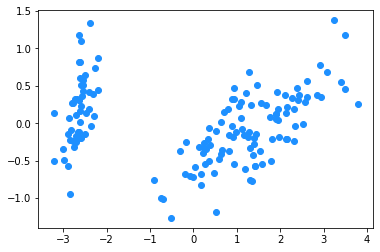

In [50]:
plt.scatter(X[:, 0], X[:, 1], c='dodgerblue')

In [51]:
iris.target.shape

(150,)

In [55]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.array((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [54]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

The perpendicular lines represent the principal components, which have a direction and orientation that best represent the variance of the original dataset.
- PCs are perpendicular, meaning there is no correlation between them.

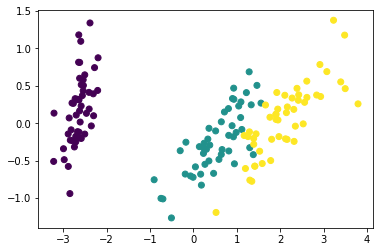

In [58]:
# How are the colours different between different groups?
# What's the criteria to determine which colour to use for each point?

plt.scatter(X_pca[:,0], X_pca[:, 1], c=iris.target)

## 9.6 Resources for Further Study of Linear Algebra
- Ch2. of Goodfellow et al. (2016) [Deep Learning](https://www.deeplearningbook.org/)
- Ch2. of Deisenroth et al. (2020) [Mathematics for ML](https://mml-book.github.io/book/mml-book.pdf)
- Sheldon Axler's (2015) [Linear Algebra Done Right](https://linear.axler.net/)
  - [videos](https://linear.axler.net/LADRvideos.html)
- My Reading List for Deep Learning! [Hamid Palangi] (https://www.microsoft.com/en-us/research/wp-content/uploads/2017/02/DL_Reading_List.pdf)

# References
------------------------------------
https://www.youtube.com/watch?v=P5mlg91as1c&ab_channel=ArtificialIntelligence-AllinOne

Plotter function

In [ ]:

# modified from plot_vectors by Hadrien Jean

def plot_vectors(vectors, values_in="label", figsize=None):
    """
    Arguments

    vectros: a list of vectors. Pass it in in square brackets[] even when plotting just a single vector.
    values_in : the vector values will be labeled around the vector's arround head. 
                if you want to corner the values as a legend, you can pass in values_in="legend".
    figsize : custom size for plot figure

    -----------

    1) This plotter sets the xlim and ylim automatically. The limit is always |1| off the min or max input value.
    2) It chooses the colour for the vector arror automatically everytime you call it. 
    3) ** for future improvement**: totally random combination of colours sometimes is not highly reliable approach to visualie elements. 
        This is due to the degree of contrast. The random colour choice must be refined to randomly choose highly contrastive combinations each time.
    """

    colors = ["lightcoral", "indianred", "brown", "firebrick", "olive", "darkslategrey", 
              "teal", "darkcyan", "lightblue", "blue", "purple", "mediumvioletred", 
              "green", "darkgreen", "forestgreen", "slategrey", "cornflowerblue", 
              "royalblue", "midnightblue", "navy", "darkorchid", "tomato", "coral", 
              "maroon", "darkred", "darkgoldenrod", "darkorange"]
    if (figsize==None):
        plt.figure()
    else:
        plt.figure(figsize=figsize)
    plt.axvline(x=0, color='lightgray', label='Origin')
    plt.axhline(y=0, color='lightgray')

    for vector in vectors:
        x = np.concatenate([[0,0],vector])

        rounded_vector = [np.round(value, 3) for value in vector]

        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[random.randint(0, len(colors))], label=f'{rounded_vector}')    
    
        if (values_in == "label"):        
            plt.annotate(str(rounded_vector), xy=(vector[0] + 0.25, vector[1] + 0.25), ha='center', va='top', c='black', fontsize=13)
        elif (values_in == "legend"):
            plt.legend()


    # sets the xlim and ylim automatically.
    flat_x = []
    flat_y = []
    for vector in vectors:
        flat_x.append(vector[0])
        flat_y.append(vector[1])

    max_x = np.max(flat_x)
    min_x = np.min(flat_x)
    max_y = np.max(flat_y)
    min_y = np.min(flat_y)

    if (max_x <= 0):
        plt.xlim(min_x - 1, 1)
    elif (min_x >= 0):
        plt.xlim(-1, max_x + 1)
    else: 
        plt.xlim(min_x - 1, max_x + 1)

    if (max_y <= 0):
        plt.ylim(min_y - 1, 1)
    elif (min_y >= 0):
        plt.ylim(-1, max_y + 1)
    else:
        plt.ylim(min_y - 1, max_y + 1)